In [1]:
import numpy as np
inf=float("inf")

import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import scipy.spatial as spatial

from scipy.spatial.distance import cdist, pdist, squareform

import geometry_objects_2021 as ge

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet

In [2]:
data = np.array([[1,1],[1,2],[2,1],[2,2],[1,7],[1,0]], dtype="double")
dist = pdist(data, "euclidean")

data1 = np.array([[1,1],[2,1],[2,2],[1,7],[1,2],[1,0]], dtype="double")
dist1 = pdist(data1, "euclidean")

In [3]:
print(squareform(dist))

[[0.         1.         1.         1.41421356 6.         1.        ]
 [1.         0.         1.41421356 1.         5.         2.        ]
 [1.         1.41421356 0.         1.         6.08276253 1.41421356]
 [1.41421356 1.         1.         0.         5.09901951 2.23606798]
 [6.         5.         6.08276253 5.09901951 0.         7.        ]
 [1.         2.         1.41421356 2.23606798 7.         0.        ]]


In [4]:
print(squareform(dist1))

[[0.         1.         1.41421356 6.         1.         1.        ]
 [1.         0.         1.         6.08276253 1.41421356 1.41421356]
 [1.41421356 1.         0.         5.09901951 1.         2.23606798]
 [6.         6.08276253 5.09901951 0.         5.         7.        ]
 [1.         1.41421356 1.         5.         0.         2.        ]
 [1.         1.41421356 2.23606798 7.         2.         0.        ]]


In [5]:
L = linkage(dist, "ward")
print(L)

[[0.         1.         1.         2.        ]
 [2.         3.         1.         2.        ]
 [6.         7.         1.41421356 4.        ]
 [5.         8.         2.         5.        ]
 [4.         9.         7.5055535  6.        ]]


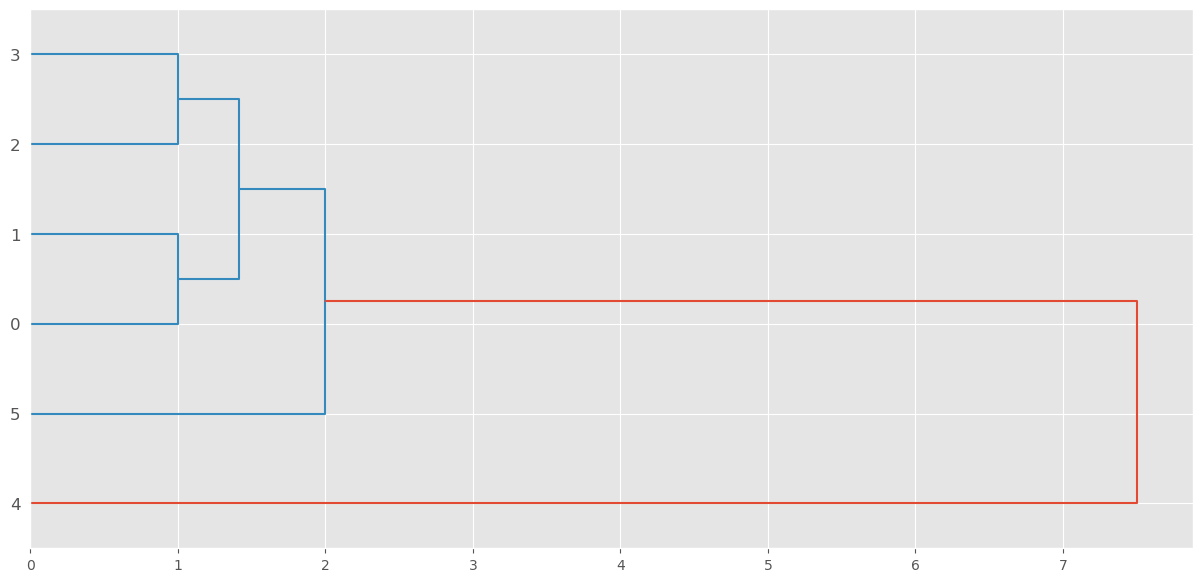

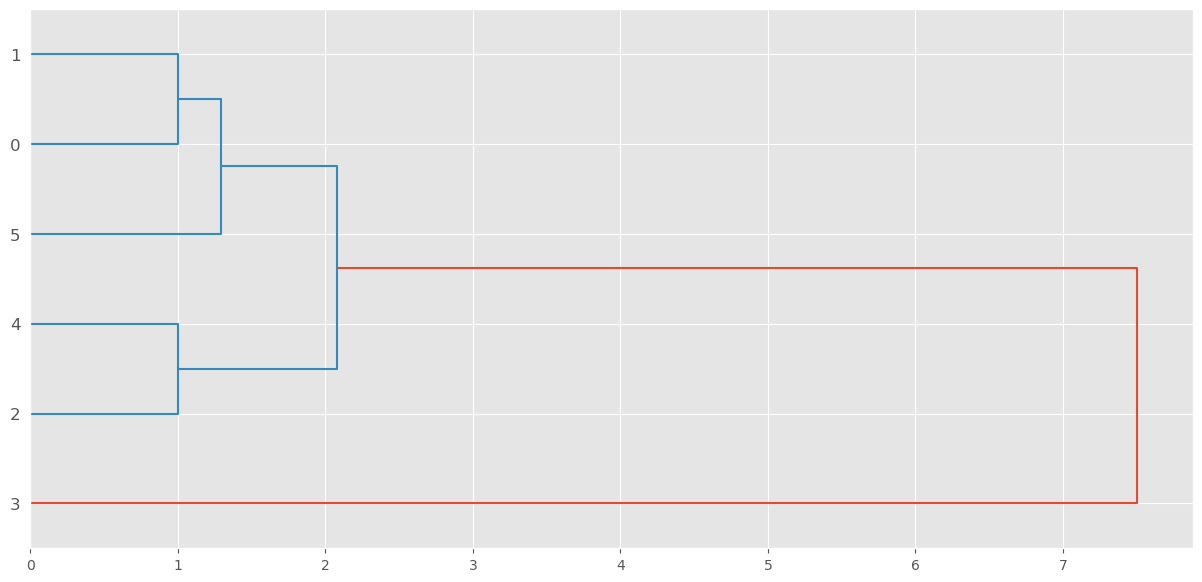

In [6]:
fig = plt.figure("0", figsize=(15,7))
L = linkage(dist, "ward")
dn=dendrogram(L, orientation='right')

fig = plt.figure("1", figsize=(15,7))
L = linkage(dist1, "ward")
dn=dendrogram(L, orientation='right')

In [7]:
print(squareform(dist))

[[0.         1.         1.         1.41421356 6.         1.        ]
 [1.         0.         1.41421356 1.         5.         2.        ]
 [1.         1.41421356 0.         1.         6.08276253 1.41421356]
 [1.41421356 1.         1.         0.         5.09901951 2.23606798]
 [6.         5.         6.08276253 5.09901951 0.         7.        ]
 [1.         2.         1.41421356 2.23606798 7.         0.        ]]


In [8]:
w = squareform(cophenet(L))
print(w)

[[0.         1.         2.081666   7.5055535  2.081666   1.29099445]
 [1.         0.         2.081666   7.5055535  2.081666   1.29099445]
 [2.081666   2.081666   0.         7.5055535  1.         2.081666  ]
 [7.5055535  7.5055535  7.5055535  0.         7.5055535  7.5055535 ]
 [2.081666   2.081666   1.         7.5055535  0.         2.081666  ]
 [1.29099445 1.29099445 2.081666   7.5055535  2.081666   0.        ]]


In [13]:
print(L)

[[0.         1.         1.         2.        ]
 [2.         4.         1.         2.        ]
 [5.         6.         1.29099445 3.        ]
 [7.         8.         2.081666   5.        ]
 [3.         9.         7.5055535  6.        ]]


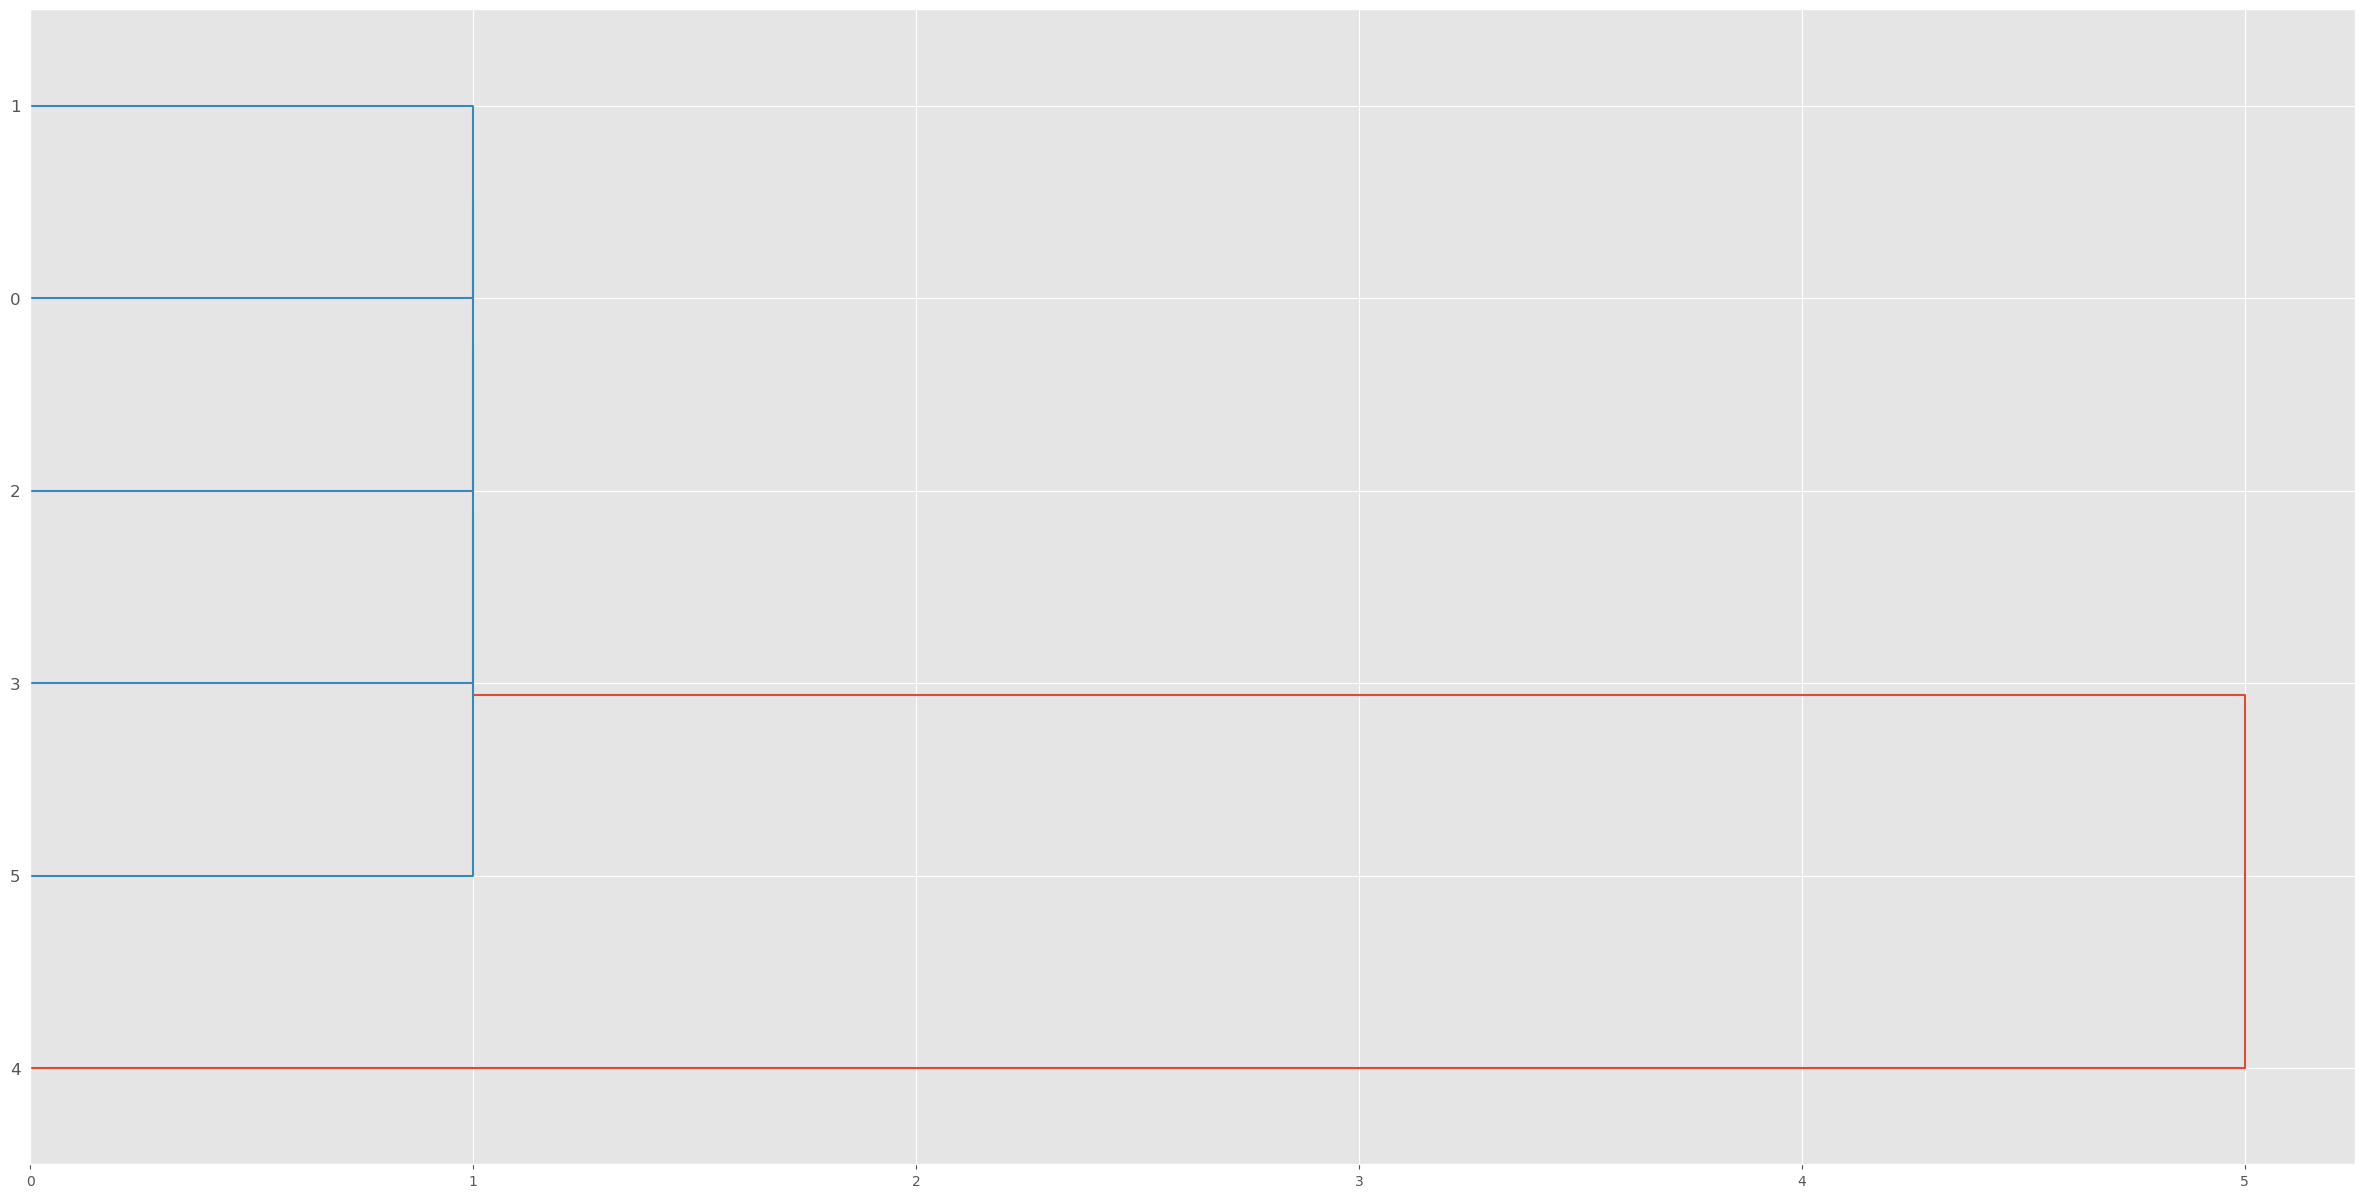

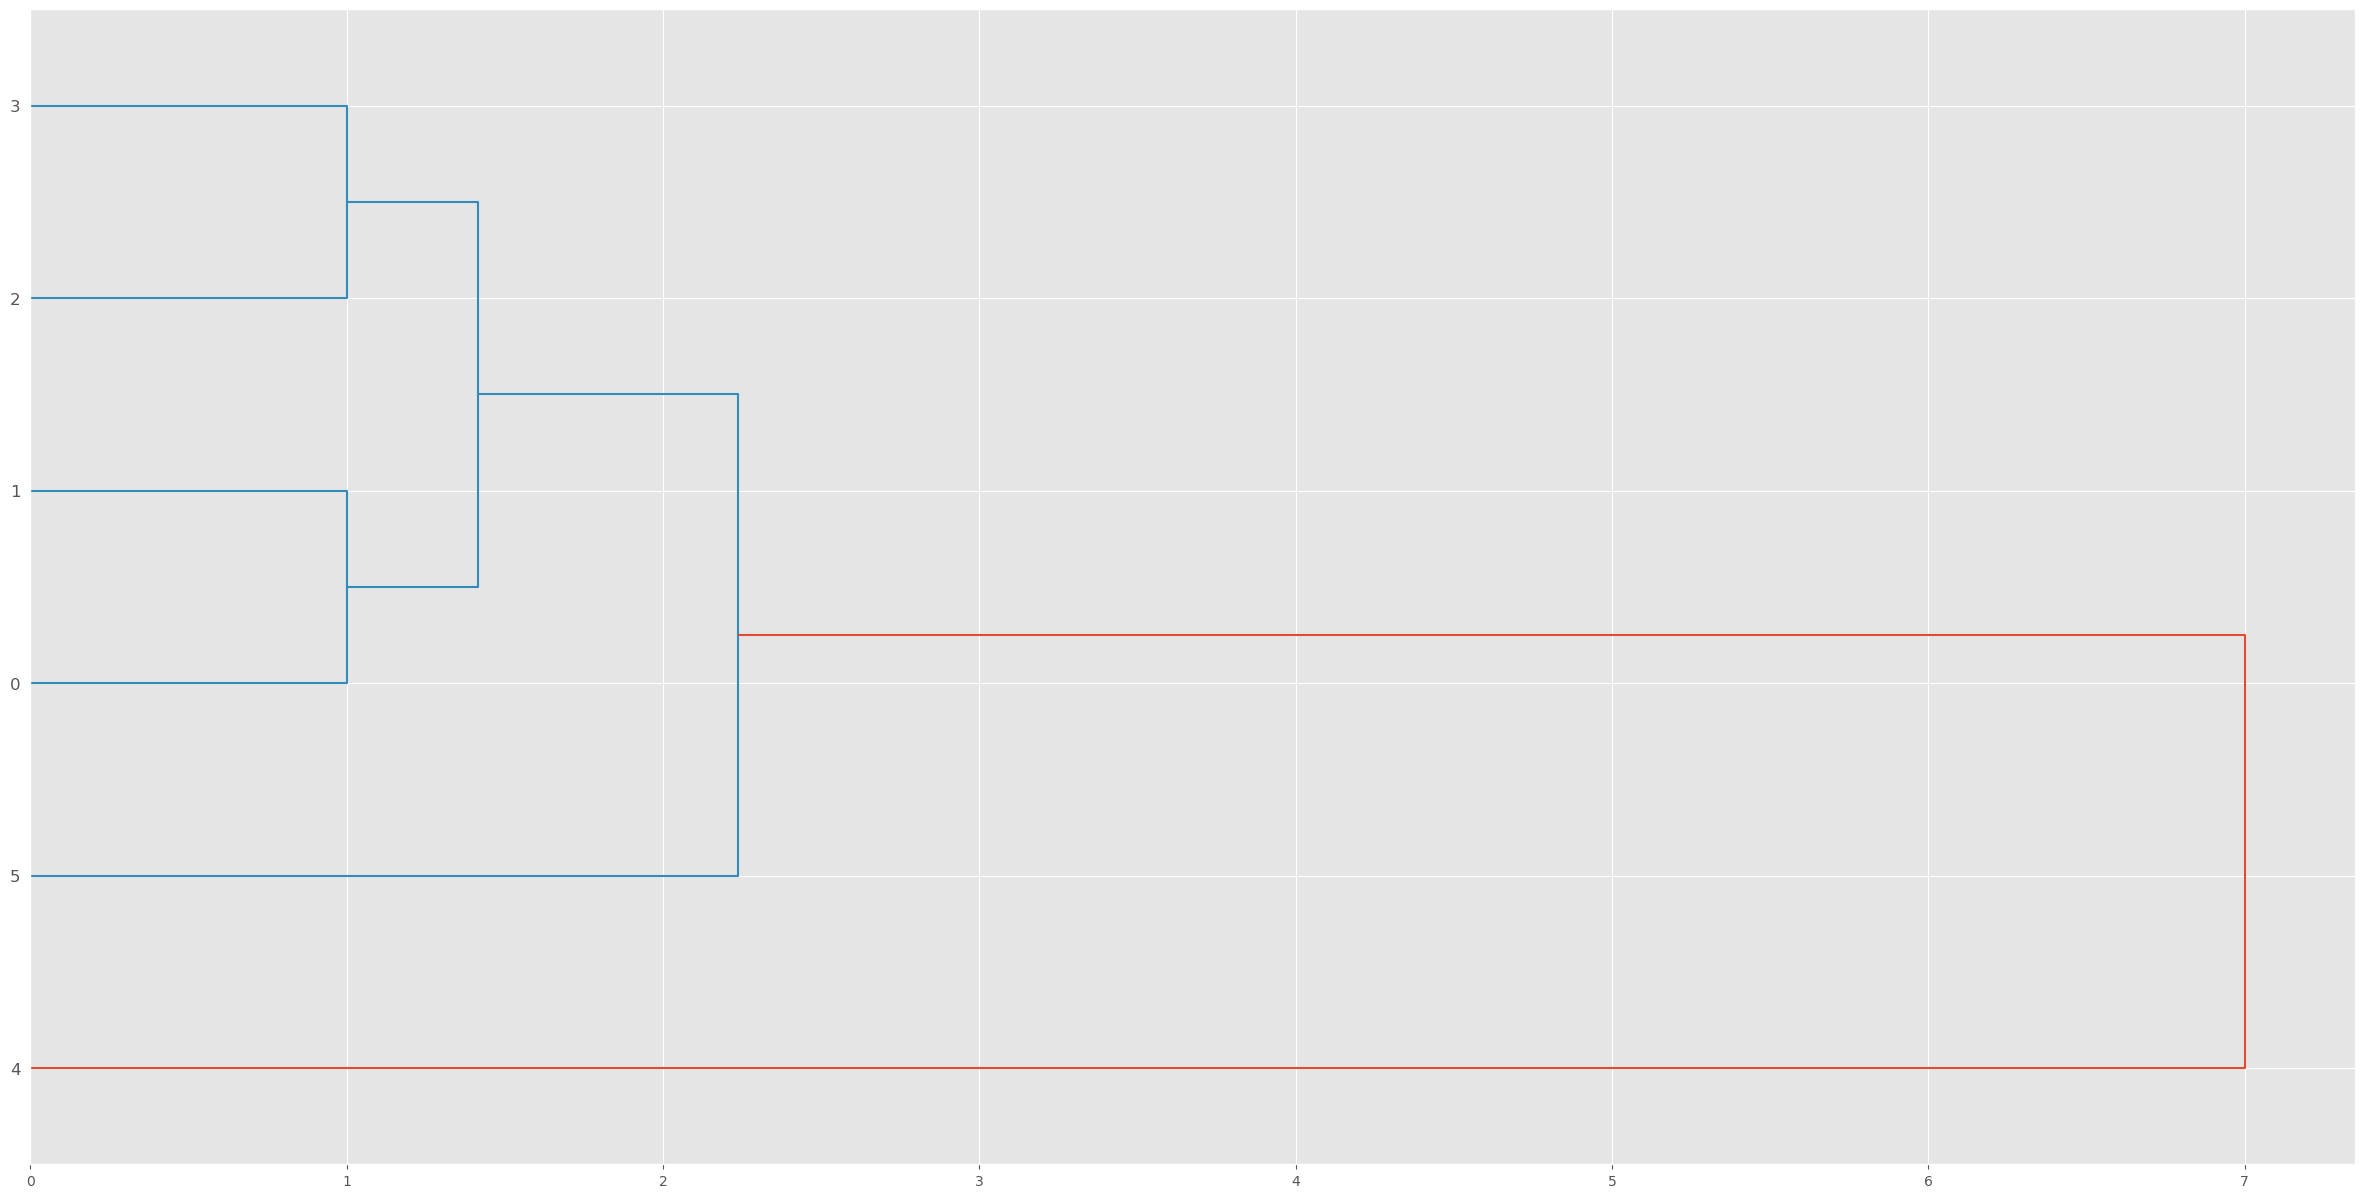

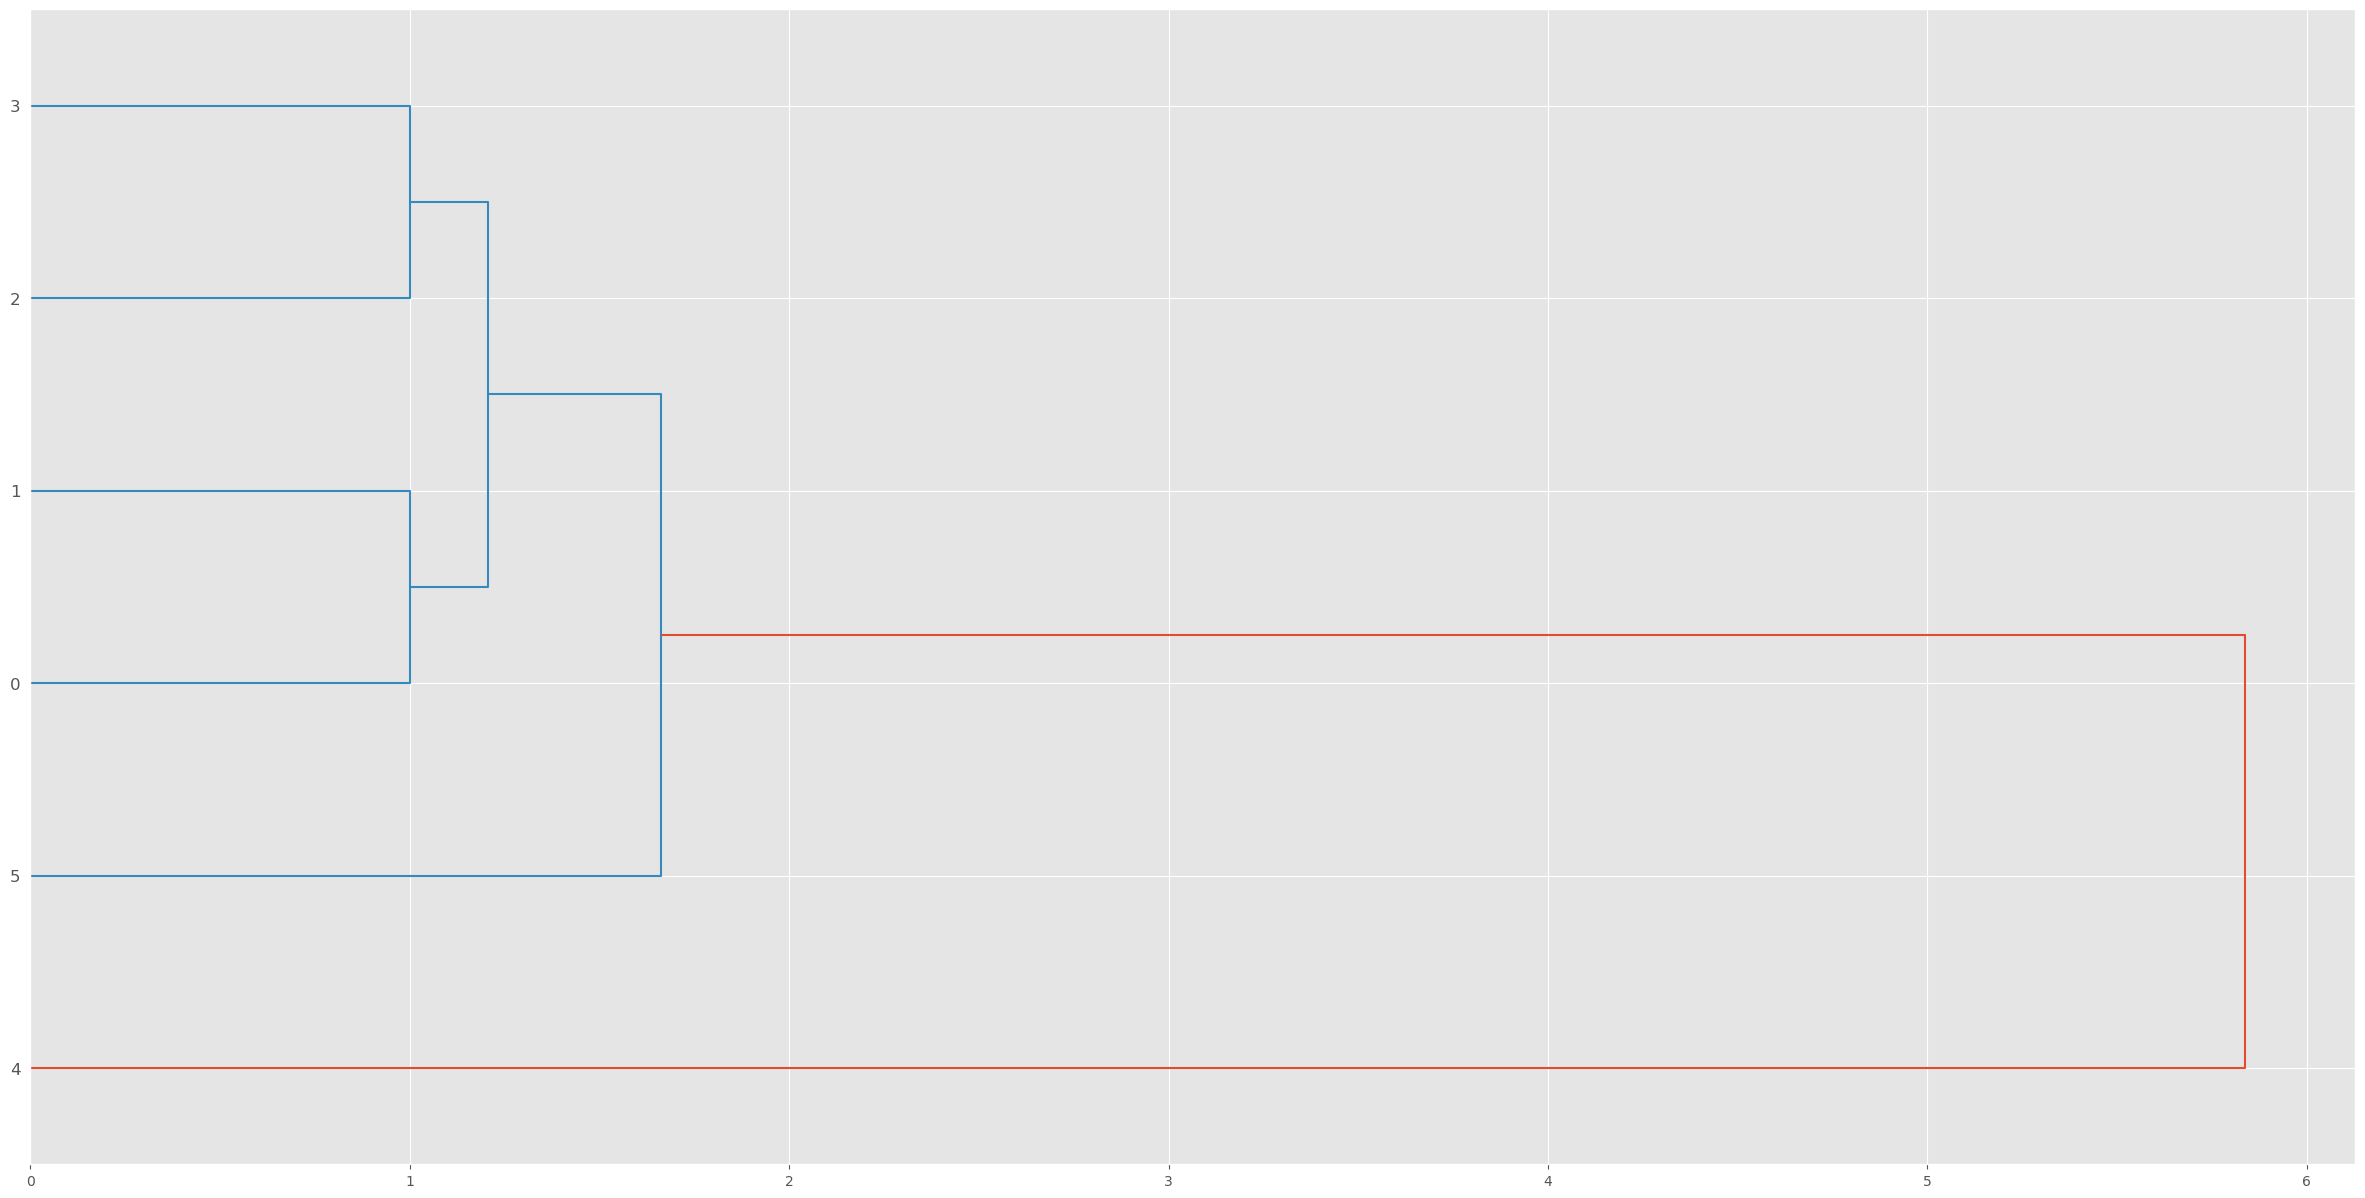

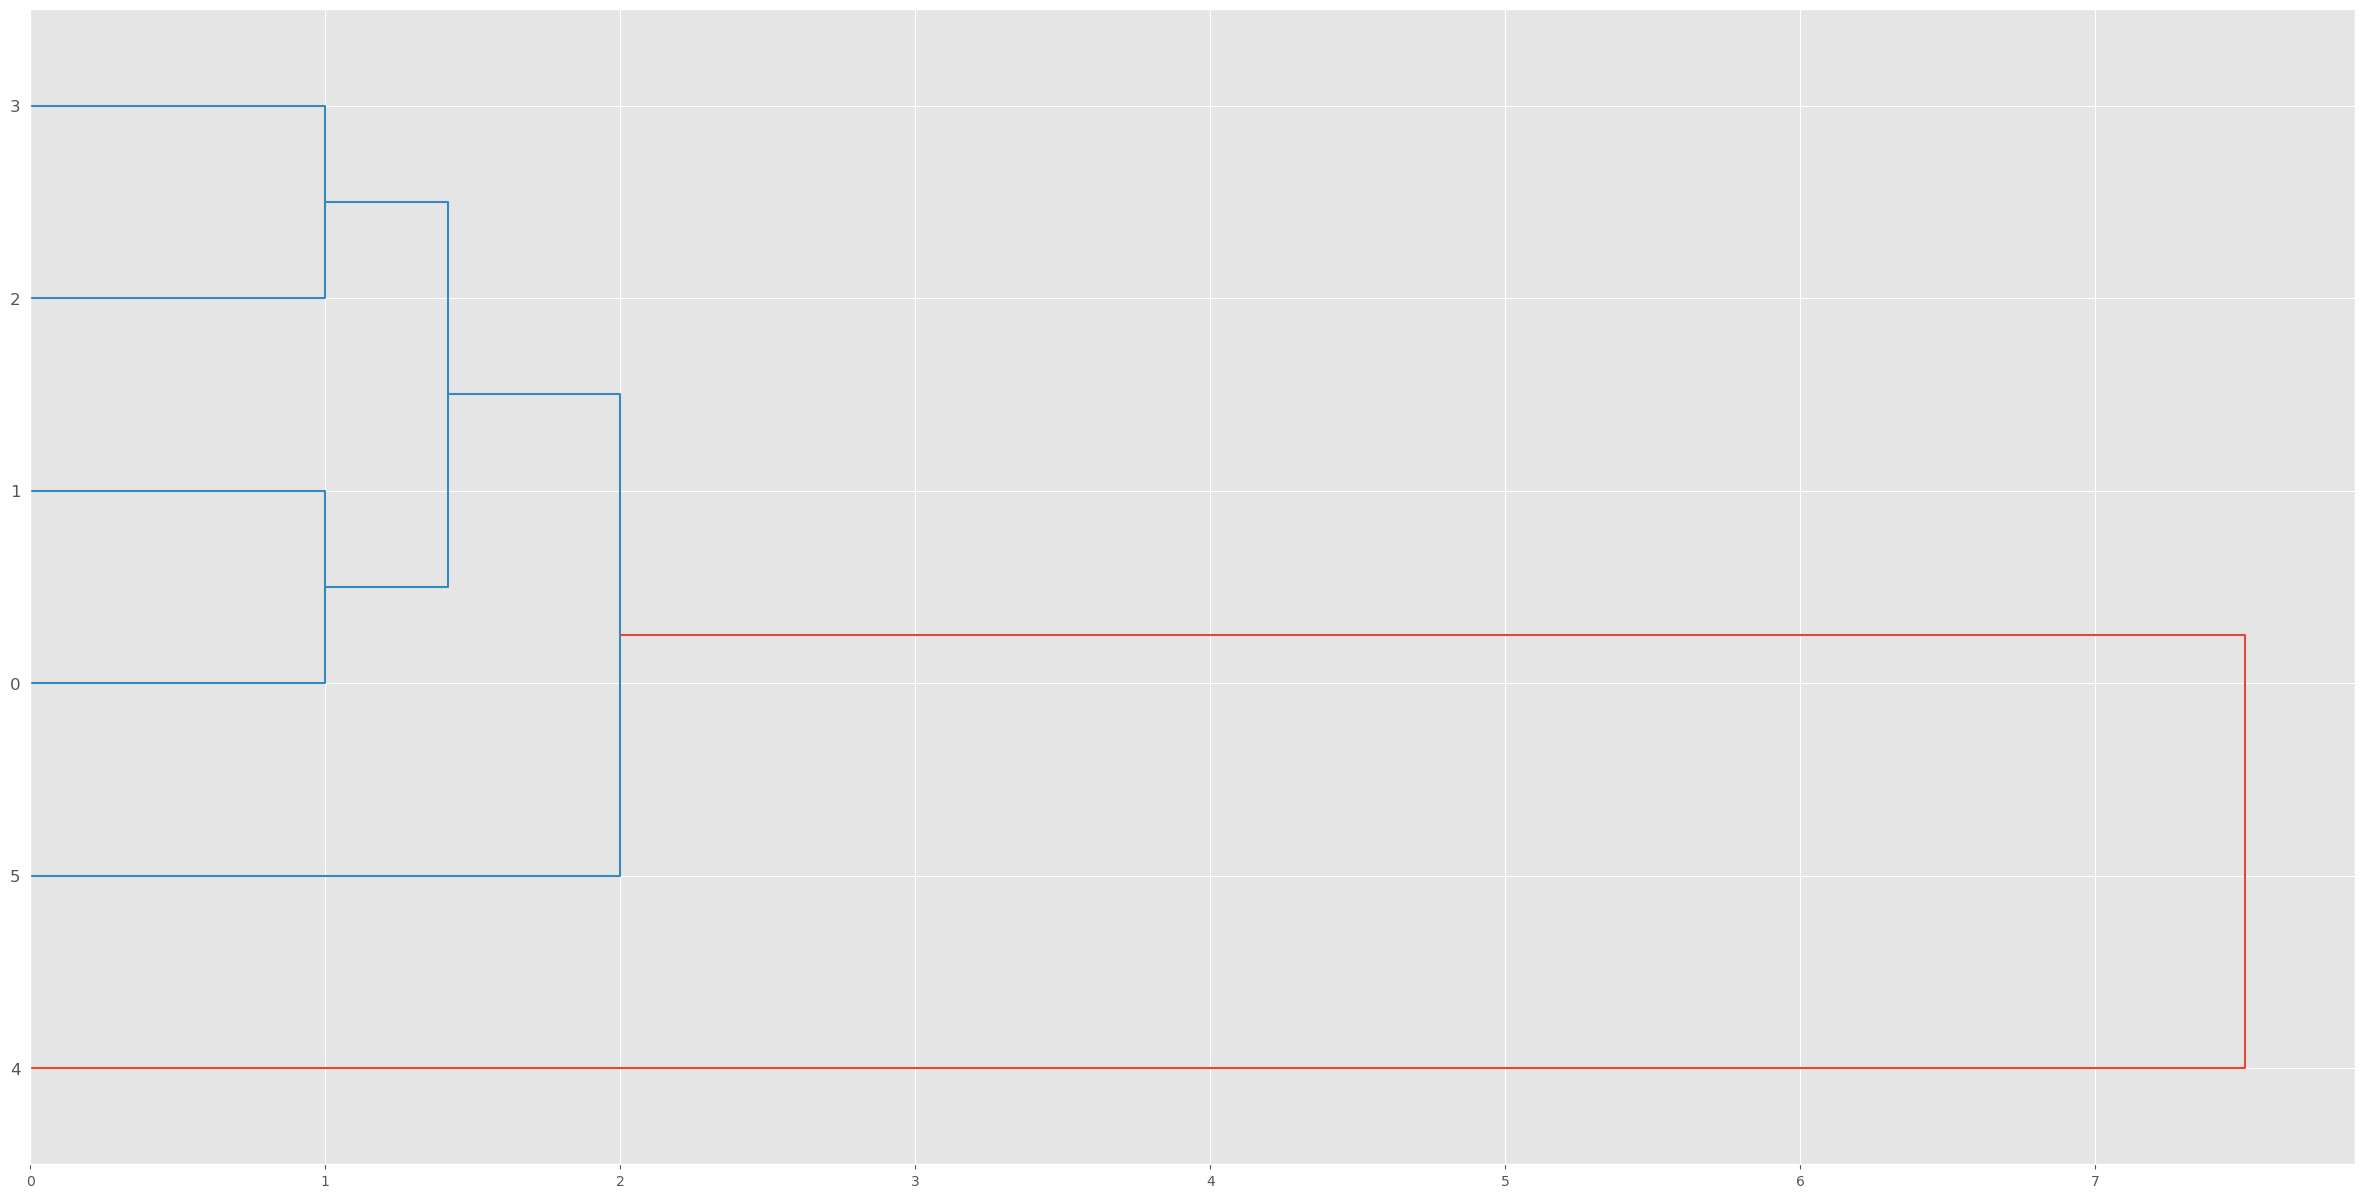

In [39]:
clustering_methods = ["single", "complete","average", "ward"]
for cm in clustering_methods:
    fig = plt.figure(cm, figsize=(30,15))
    L = linkage(dist, cm)
    dn=dendrogram(L, orientation='right')

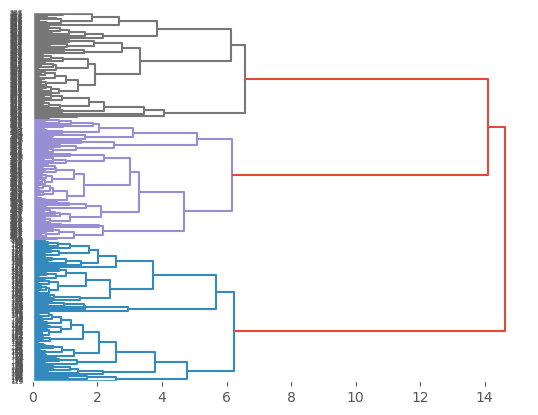

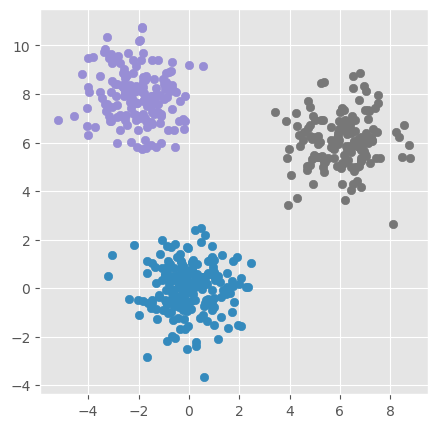

In [55]:
point1 = [0,0]
number_points1 = 200
point2 = [6,6]
number_points2 = 150
point3 = [-2,8]
number_points3 = 170
data1 = ge.normal_point(point1, number_points1)
data2 = ge.normal_point(point2, number_points2)
data3 = ge.normal_point(point3, number_points3)

data = np.vstack([data1, data2, data3])
dist= pdist(data, "euclidean")



cm = "complete"
L = linkage(dist, cm)
plt.figure("dendrogram "+cm)
dn=dendrogram(L, orientation='right')


plt.figure(figsize=(5,5))
for i in range(len(dn['leaves'])):
    point = data[dn['leaves'][i]]
    color = dn['leaves_color_list'][i]
    plt.scatter(point[0], point[1], color=color)


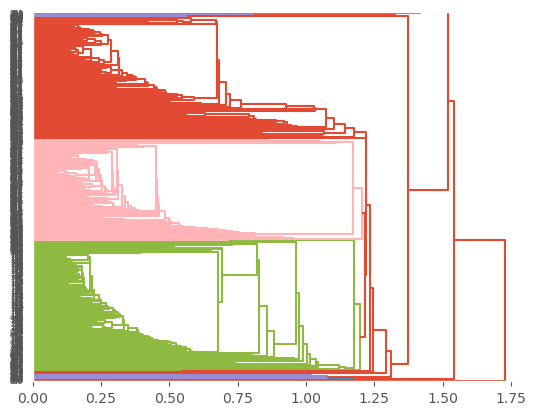

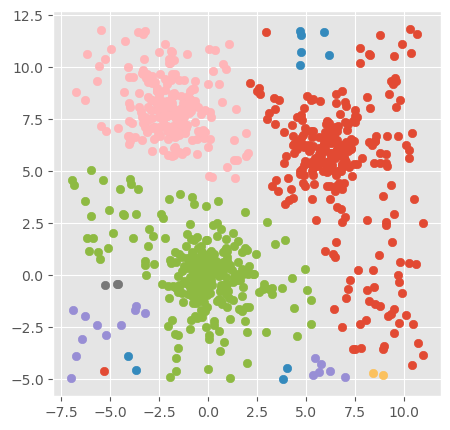

In [59]:
noise = ge.uniform_noise(-7, 11, -5, 12, 300)
data_noisy =  np.vstack([data, noise])
dist_noisy= pdist(data_noisy, "euclidean")

cm = "single"
L = linkage(dist_noisy, cm)
plt.figure("dendrogram "+cm)
dn=dendrogram(L, orientation='right')


plt.figure(figsize=(5,5))
for i in range(len(dn['leaves'])):
    point = data_noisy[dn['leaves'][i]]
    color = dn['leaves_color_list'][i]
    plt.scatter(point[0], point[1], color=color)


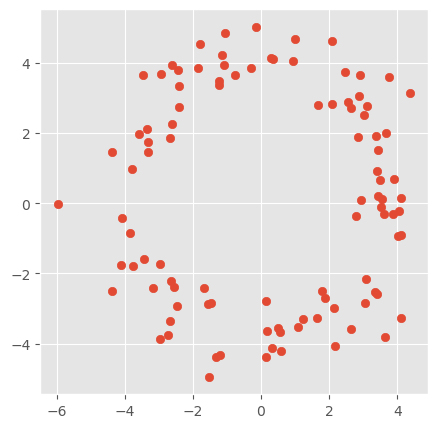

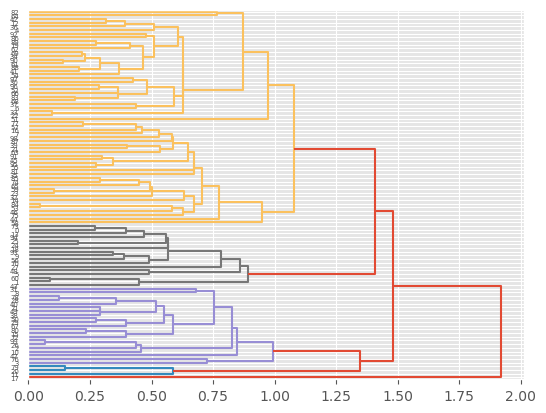

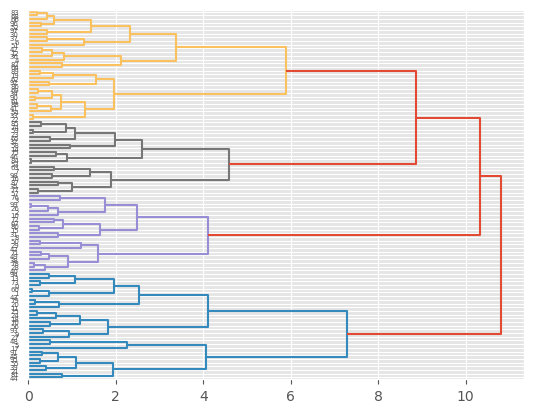

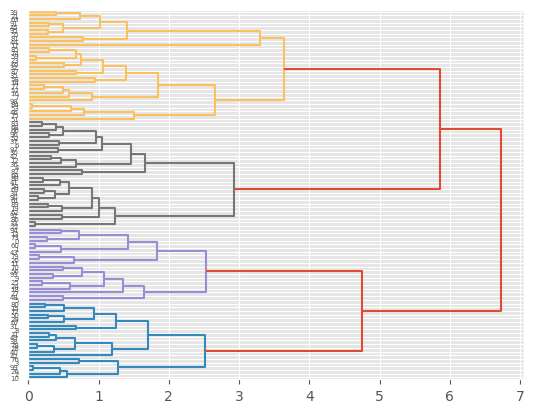

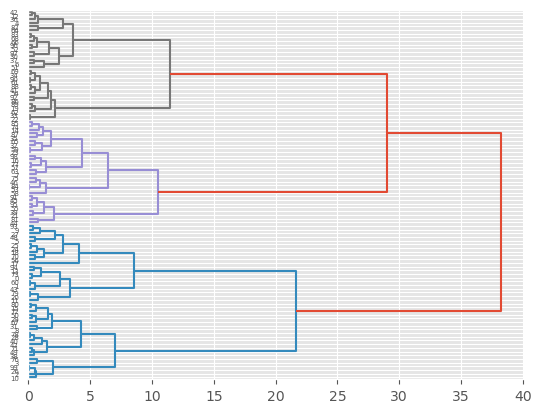

In [9]:


center = [0,0]
r = np.double(4)
number_points = 100
error=1
circle = ge.circle(center,r,number_points, error)
plt.figure(figsize=(5,5))
plt.scatter(circle[:,0], circle[:,1])

dist= pdist(circle, "euclidean")
for cm in ["single", "complete","average","ward"]:
    L = linkage(dist, cm)
    plt.figure("dendrogram "+cm)
    dn=dendrogram(L, orientation='right')

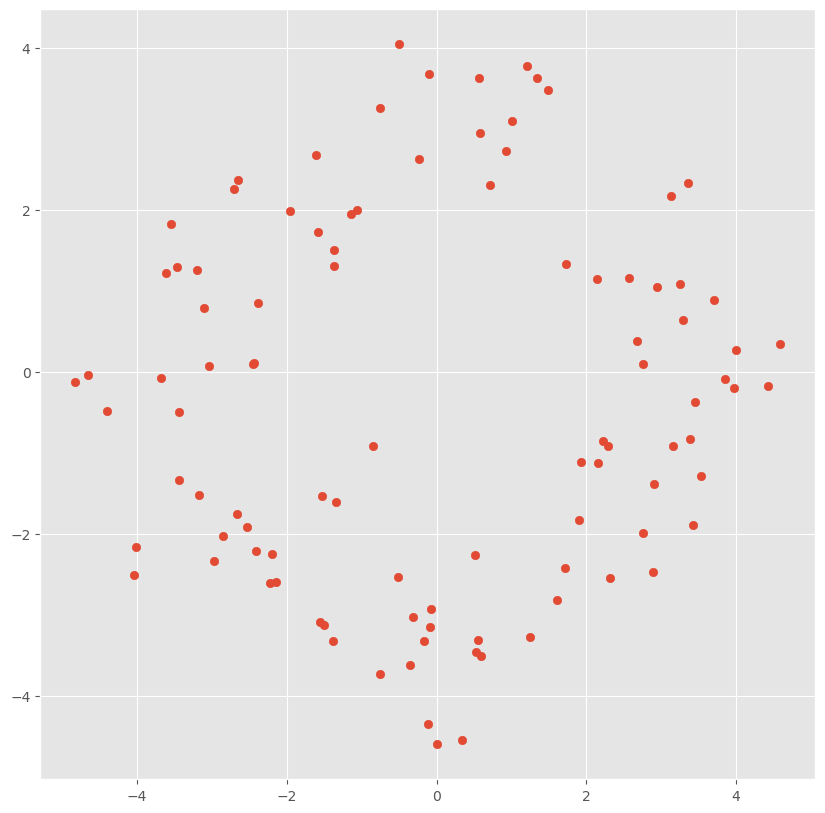

In [18]:
 
vertices = [[0,4], [-4,0],[0,-4],[4,0]]
number_points = 100
error =1
square = ge.closed_path(vertices, number_points, error)
plt.figure(figsize=(10,10))
plt.scatter(square[:,0], square[:,1])

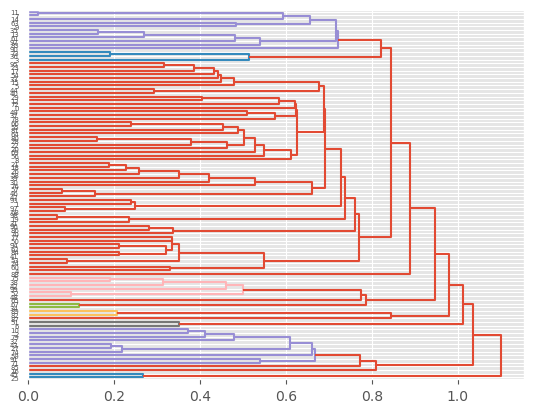

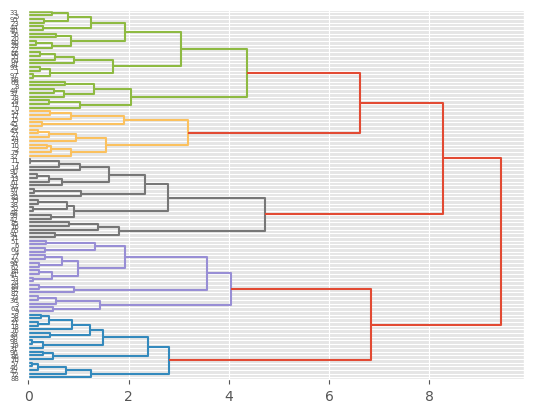

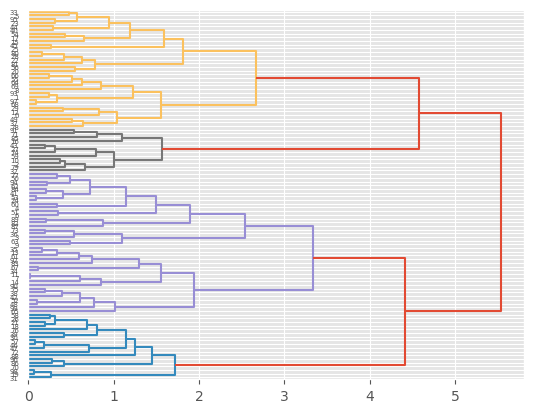

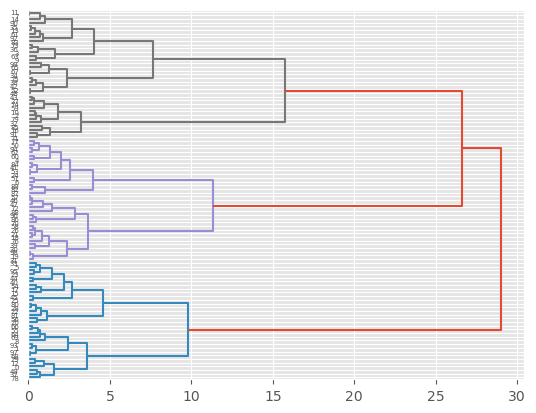

In [21]:
dist= pdist(square, "euclidean")
for cm in ["single", "complete","average","ward"]:
    L = linkage(dist, cm)
    plt.figure("dendrogram "+cm)
    dn=dendrogram(L, orientation='right')